Elizabeth produced some predictions for expected correlation functions from her HOD. I'm going to plot those against the results I've calculated via halotools.

In [1]:
import numpy as np
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
from itertools import cycle
from collections import defaultdict
colors = cycle(sns.color_palette())

In [2]:
a = 1.0
outputdir = '/u/ki/swmclau2/des/HODOutput/'

sim = 'guppy'
datadir = outputdir+'%s_step_tests/'%sim

#rbins = np.logspace(-1, 1.25, 15)
#rbin_centers = (rbins[1:]+rbins[:-1])/2

In [3]:
data = {}
predictions = {}
#for mMin in [12.0+i*0.25 for i in xrange(8)]:
for mMin in [12.0, 12.25, 12.50, 12.75, 13.0, 13.25, 13.5, 13.75]:
    data[mMin] = np.loadtxt(datadir+'corr_%.3f_stepFunc_mm_%.2f.npy'%(a,mMin) )
    #predictions[mMin] = np.loadtxt('/u/ki/swmclau2/des/HODOutput/xi_chinchilla/redm_Mmin%.2f'%(mMin) )

In [5]:
print data[12.0][0, :]

[  0.2387092    0.33111162   0.45928227   0.63706676   0.8836702
   1.22573185   1.70020283   2.35833772   3.27123136   4.5374988
   6.29392824   8.73025743  12.10967013  16.79722641  23.29929817
  32.31826982  44.82841313  62.18113268  86.25095093]


In [40]:
if data[12.0].shape[0] == 19:
    rbins = np.logspace(-1, 1.7, 20)
else:
    rbins = np.logspace(-1, 1.25, 15)
rbin_centers = (rbins[1:]+rbins[:-1])/2 #Here or in the loop?

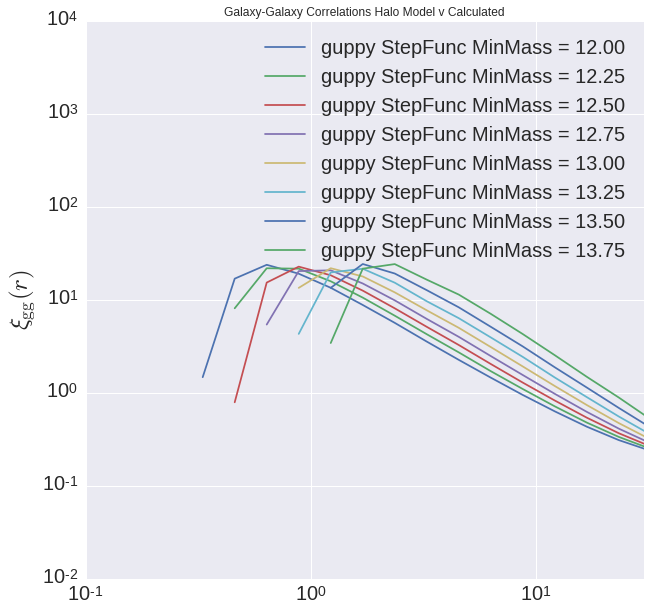

In [9]:
fig = plt.figure(figsize = (10,10))
for mMin, color in zip(sorted(data.iterkeys()), colors):
    #rbins = np.logspace(-1, 1.7, 20)
    #rbin_centers = (rbins[1:]+rbins[:-1])/2

    plt.plot(data[mMin][0, :], data[mMin][1,:], label = '%s StepFunc MinMass = %.2f'%(sim, mMin), color = color)
    #plt.plot(rbin_centers, data[mMin], label = '%s RedMagic MinMass = %.2f'%(sim, mMin), color = color)
    #plt.plot(predictions[mMin][:,0], predictions[mMin][:,1], ls = '--', color = color  )

    
plt.title('Galaxy-Galaxy Correlations Halo Model v Calculated')
plt.xlim(xmin = 0.1, xmax = 30)
plt.ylim(ymin = 1e-2, ymax = 1e4)
plt.loglog()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#plt.xlabel(r'$r $  $\rm{[Mpc]}$', fontsize=25)
plt.ylabel(r'$\xi_{\rm gg}(r)$', fontsize=25)
plt.legend(loc='best', fontsize=20)  

plt.show()

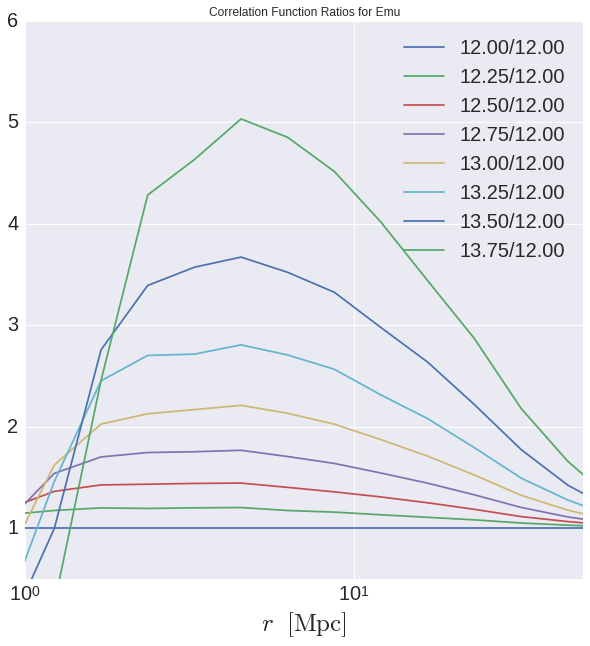

In [15]:
colors = cycle(sns.color_palette())

rbins = np.logspace(-1, 1.7, 20)
rbin_centers = (rbins[1:]+rbins[:-1])/2

fig = plt.figure(figsize = (10,10))
#for vn, color in zip(version_names, colors):
lowest_mass = min(data.iterkeys())
for mm, color in zip(sorted(data.iterkeys()), colors):
    #print '%.2f/12.25:\t'%(mm), '%.2f'%np.mean(data[mm][6:]/data[12.25][6:])
    plt.plot(data[mm][0,:], data[mm][1,:]/data[lowest_mass][1,:], label = '%.2f/%.2f'%(mm, lowest_mass), color = color)
    #plt.plot(rbin_centers, np.ones(rbin_centers.shape)*ratio_prediction[mm], ls = '--',lw = 3,color = color)
        
plt.title('Correlation Function Ratios for Emu')
plt.xlim(xmin = 1, xmax = 50)

plt.ylim(ymin = 0.5, ymax = 6)
#plt.loglog()
plt.xscale('log')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel(r'$r $  $\rm{[Mpc]}$', fontsize=25)
plt.legend(loc='best', fontsize=20)

plt.show()